In [1]:
import os

In [3]:
filePath = "hello.png"
os.path.splitext(os.path.basename(filePath)) # ('hello', '.png')
fileNamePart = os.path.splitext(os.path.basename(filePath))[0]
fileExtensionPart = os.path.splitext(os.path.basename(filePath))[1]
fileNamePart, fileExtensionPart # ('hello', '.png')

('hello', '.png')

In [4]:
import pydot
import os

from tree_node import TreeRootNodeBase
 
os.environ["PATH"] += os.pathsep + "/usr/local/Cellar/graphviz/2.50.0/bin"

In [22]:
graph = pydot.Dot('my_graph', graph_type='graph', bgcolor='yellow')



In [23]:
# Add nodes
my_node = pydot.Node('a', label='Foo')
graph.add_node(my_node)
# Or, without using an intermediate variable:
graph.add_node(pydot.Node('b', shape='circle'))


In [24]:

# Add edges
my_edge = pydot.Edge('a', 'b', color='blue')
graph.add_edge(my_edge)
# Or, without using an intermediate variable:
graph.add_edge(pydot.Edge('b', 'c', color='blue'))

graph.add_edge(pydot.Edge('b', 'd', style='dotted'))


In [25]:

graph.set_bgcolor('lightyellow')
graph.get_node('b')[0].set_shape('box')


In [26]:

graph.write_png("Hello.png")

In [6]:
from IPython.display import Image, display

In [7]:
def view_pydot(pdot: pydot.Dot):
  plt = Image(pdot.create_png())
  display(plt)

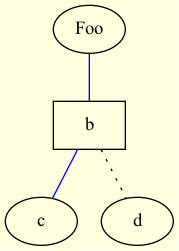

In [27]:
view_pydot(graph)

In [28]:
my_node.get_name()

'a'

In [29]:
import uuid

In [30]:
my_node = pydot.Node(str(uuid.uuid4()), label='Bar')
guid = my_node.get_name()

In [ ]:
graph.add_node(my_node)

In [31]:
my_node.get_name()

'"a6abfac6-cc6a-4fd7-913a-d4cdc0cc2e73"'

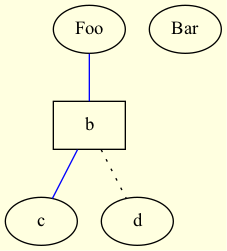

In [32]:
view_pydot(graph)

In [39]:
import pydot
import os
import uuid

from tree_node import TreeRootNodeBase
 
os.environ["PATH"] += os.pathsep + "/usr/local/Cellar/graphviz/2.50.0/bin"

In [1]:
import pytest

from tree_draw import draw_new_tree, save, view_graph

from tree_node import TreeNode


In [2]:

def _generate_child_node(level:int, childNo: int):
    return TreeNode(name=f'TreeNode_Layer_{level}_child{childNo}')

def _build_complex_tree():
    tree = TreeNode(name='RootTreeNode')
    layer1 = [_generate_child_node(1, i+1) for i in range(2)]
    for i,n in enumerate(layer1):
        tree.appendChild(n)
        numChildren = 2
        layer2n = [_generate_child_node(2,(i*numChildren)+j+1) for j in range(numChildren)]
        for j,nn in enumerate (layer2n):
            n.appendChild(nn)
    return tree


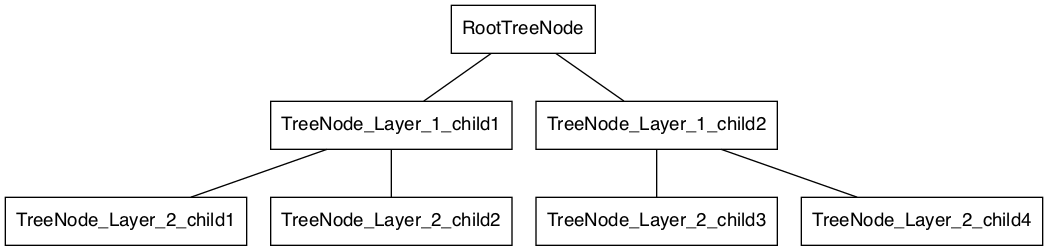

In [3]:


tree = _build_complex_tree()
graph = draw_new_tree(tree)
dotString = graph.to_string()
# print(dotString)
# assert dotString == 'graph G {\nrankdir=UD;\n"c50ba588-6164-4f4d-83e6-50ce839d8e01" -- "599f28a1-5a8b-49d1-ada4-293b376be495";\n"599f28a1-5a8b-49d1-ada4-293b376be495" -- "594d08cf-0a50-44c5-a81e-035f1b3628e6";\n"599f28a1-5a8b-49d1-ada4-293b376be495" -- "34b16164-e80d-40e4-b335-7b51958950d4";\n"c50ba588-6164-4f4d-83e6-50ce839d8e01" -- "73ced6d6-fdde-4870-8b16-96fb5b3e40cc";\n"73ced6d6-fdde-4870-8b16-96fb5b3e40cc" -- "2a4ef4de-fa56-411e-893c-39cd41927c4a";\n"73ced6d6-fdde-4870-8b16-96fb5b3e40cc" -- "a8c5bae2-4dab-470d-814b-61760d31c304";\n}\n'
view_graph(graph)

In [38]:
save(graph,"Hello.png")